# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Inteligência Computacional</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>

# <center>Regressão logística</center>

Introdução
----------
Neste exercício, iremos usar o método de **regressão logística** com vários exemplos em 2D. Os experimentos conduzidos neste exercício foram realizados com o intuito de ajudar a entender como o método funciona.



## Parte 1: Visualizando as amostras da base de dados 1

O primeiro exemplo é baseado em uma base de dados cujas classes podem ser separadas usando um classificador linear.

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes

#importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'dados/data1.csv', sep=',', index_col=None, header=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Agora, vamos dar uma olhada nas 5 primeiras amostras da base de dados.

In [2]:
#vamos usar a função display para imprimir o dataframe
display(df_dataset.head(n=6))

,0,1,2
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1
5,4.0150,3.1937,1


Vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor.

In [3]:
#pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values

#pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values

#imprime as 5 primeiras linhas da matriz X
display('X:', X[0:5,:])

#imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

'X:'

array([[1.9643, 4.5957],
       [2.2753, 3.8589],
       [2.9781, 4.5651],
       [2.932 , 3.5519],
       [3.5772, 2.856 ]])

Y: [1 1 1 1 1]


Agora, vamos criar uma função para plotar os dados.

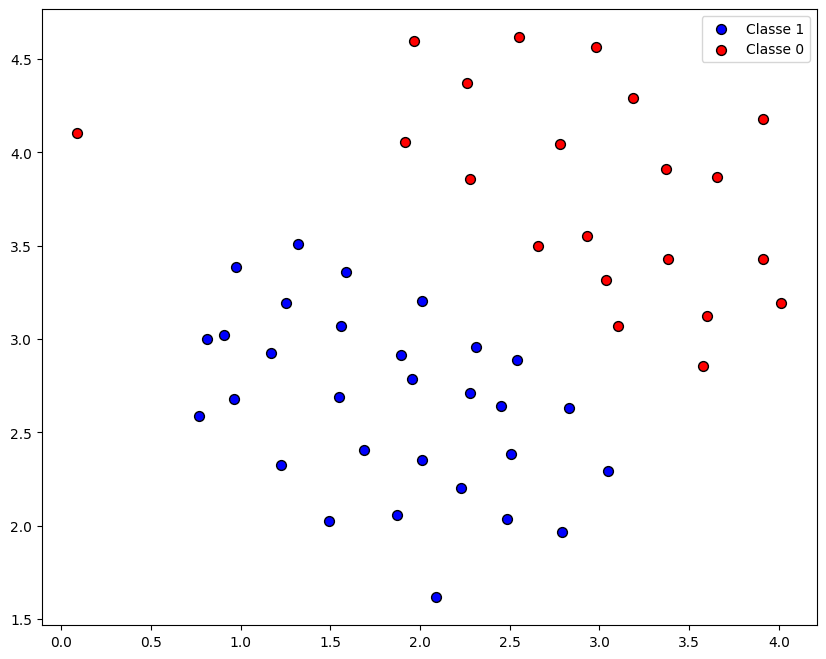

In [4]:
#importa a biblioteca matplotlib
import matplotlib.pyplot as plt

#função para plotar os dados
def visualizarDados(X,Y):
    """
    Função usada para plotar os dados
    """

    #define o tamanho da figura
    plt.figure(figsize=(10,8))

    #plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label='Classe 1', color='blue', s=50, edgecolors='k')

    #plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label='Classe 0', color='red', s=50, edgecolors='k')

    #plota a legenda
    plt.legend()

#chama a função que plota os dados
visualizarDados(X,Y)
plt.show()

## Parte 2: Treinando a regressão logística

Vamos treinar um modelo de classificação usando o método de regressão logística. Para isso, iremos empregar a biblioteca **scikit-learn**.

Você deve setar o parâmetro de regularização com um valor de custo igual a 1.0. Na biblioteca *scikit learn*, o custo da regressão logística é um parâmetro que deve ter valor positivo e que é inverso à força de regularização. Quanto menor o valor desse parâmetro, maior é a regularização.

In [7]:
########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) importe o método de Regressão Logística da biblioteca Scikit-learn
# (2) inicialize o método com custo igual a 1.0
# (3) inicialize o método com um valor para o parâmetro random state
# (4) use o método fit para treinar o modelo

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 1.0, max_iter = 500, random_state = 10)
model.fit(X, Y)


##########################################################################

print('Informações do modelo: ')
print(model)

print('\nPesos encontrados: ')
print(model.coef_) # returns a matrix of weights (coefficients)

Informações do modelo: 
LogisticRegression(max_iter=500, random_state=10)

Pesos encontrados: 
[[1.42481469 2.54780597]]


Agora, vamos plotar o limite de decisão gerado pela regressão logística.

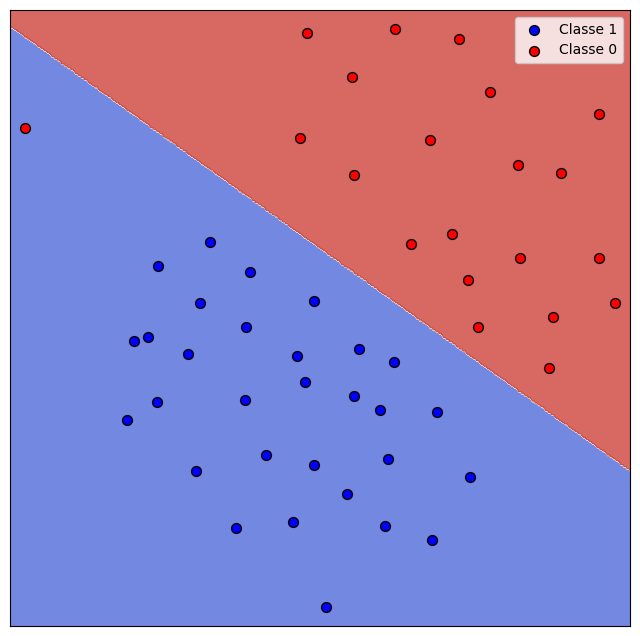

In [8]:
#função para plotar o limite de decisão
def plota_limite_decisao(model, X, Y, ax):

    x = X[:, 0]
    y = X[:, 1]

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    ax.set_xlim(x.min()-0.1, x.max()+0.1)
    ax.set_ylim(y.min()-0.1, y.max()+0.1)
    ax.set_xticks(())
    ax.set_yticks(())

    #plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label='Classe 1', color='blue', s=50, edgecolors='k')

    #plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label='Classe 0', color='red', s=50, edgecolors='k')

    #insere a legenda
    plt.legend()


# define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 8))

# plota o limite de decisão
plota_limite_decisao(model, X, Y, ax)
plt.show()


O gráfico acima apresenta o limite de decisão criado pelo modelo com custo igual a 1. Agora, vamos gerar outro modelo, mas usando custo igual a 100.

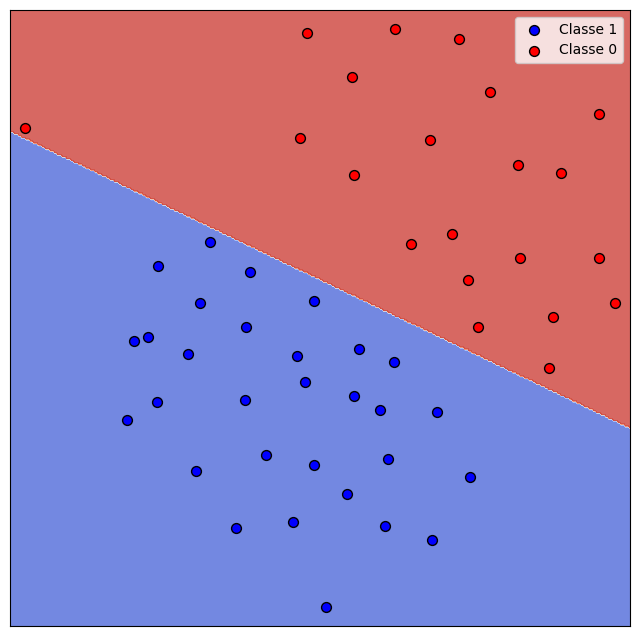

In [9]:
########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) importe o método de Regressão Logística da biblioteca Scikit-learn
# (2) inicialize o método com custo igual a 100.0
# (3) inicialize o parâmetro que contém o critério de parada
# (4) inicialize o método com um valor para o parâmetro random state
# (4) use o método fit para treinar o modelo



model = LogisticRegression(C = 100.0, max_iter = 500, random_state = 10)
model.fit(X, Y)


##########################################################################

# define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 8))

# plota o limite de decisão
plota_limite_decisao(model, X, Y, ax)
plt.show()

Conforme pode ser observado nos exemplos acima, quando usamos valores altos para o parâmetro de custo, a regressão logística tenta classificar todos os exemplos de treinameto corretamente (baixa regularização)

Antes de ir para a próxima etapa, você pode testar outros valores de custo e verificar como isso afeta o limite de decisão.

## Parte 3: Regressão logística aplicada em dados não separáveis linearmente

Antes de implementar a regressão logística, vamos importar e visualizar a segunda base de dados.

'X:'

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

Y: [1 1 1 1 1]


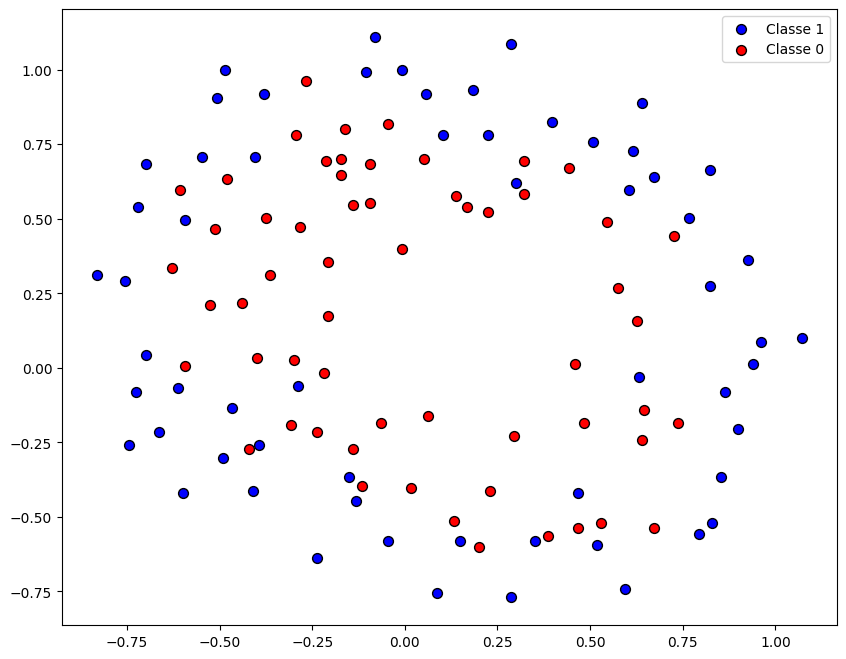

In [10]:
# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset2 = pd.read_csv( 'dados/dados2.csv', sep=',', index_col=None)

#pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X2 = df_dataset2.iloc[:, 0:-1].values

#pega os valores da última coluna e guarda em um vetor Y
Y2 = df_dataset2.iloc[:, -1].values

#imprime as 5 primeiras linhas da matriz X
display('X:', X2[0:5,:])

#imprime os 5 primeiros valores de Y
print('Y:', Y2[0:5])

#plota os dados de treinamento
visualizarDados(X2,Y2)
plt.show()


Claramente, as amostras não são linearmente separáveis e, portanto, novos atributos polinomiais precisarão ser criados para melhorar o limite de decisão da regressão logística.

Abaixo, vamos construir uma função que gera dados polinomiais. Esta função mapeia o vetor original com apenas duas colunas em um vetor transformado com 28 dimensões. Dessa forma, o classificador gerado pela regressão logística será treinado com uma base de dimensão mais elevada e poderá produzir um limite de decisão mais complexo.

In [11]:
def atributosPolinomiais(X1,X2):
    """
    Gera atributos polinomiais a partir dos atriburos
    originais da base.

    Retorna um novo vetor de mais atributos:
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    As entradas X1, X2 devem ser do mesmo tamanho.
    """

    grau=6

    # se se X1 é um array. Se não for, converte para array
    if not isinstance(X1,  np.ndarray):
        X1 = np.array( [[X1]] )
        X2 = np.array( [[X2]] )

    out = np.ones( len(X1) )

    for i in range( 1,grau+1 ):
        for j in range( 0,i+1 ):
            out_temp = ( X1**(i-j) ) * (X2**j)

            out = np.column_stack( (out,out_temp) ) # Adicionar uma coluna de 1s em x

    return out

# atributosPolinomiais adiciona novas colunas que correspondem a atributos polinomiais
X2_poli = atributosPolinomiais(X2[:,0],X2[:,1])

print('Dimensão do novo conjunto de dados polinomiais: \n', X2_poli.shape)

Dimensão do novo conjunto de dados polinomiais: 
 (118, 28)


Se por um lado o mapeamento dos atributos pode aumentar a robustez do classificador, por outro, ele ficará mais suscetível ao super-ajustamento dos dados (*overfitting*). Assim sendo, para resolver esse impasse, você precisará implementar a regressão logística com regularização.

Agora, vamos treinar a regressão logística com as amostras dessa segunda base de dados. Teste diferentes valores de custo

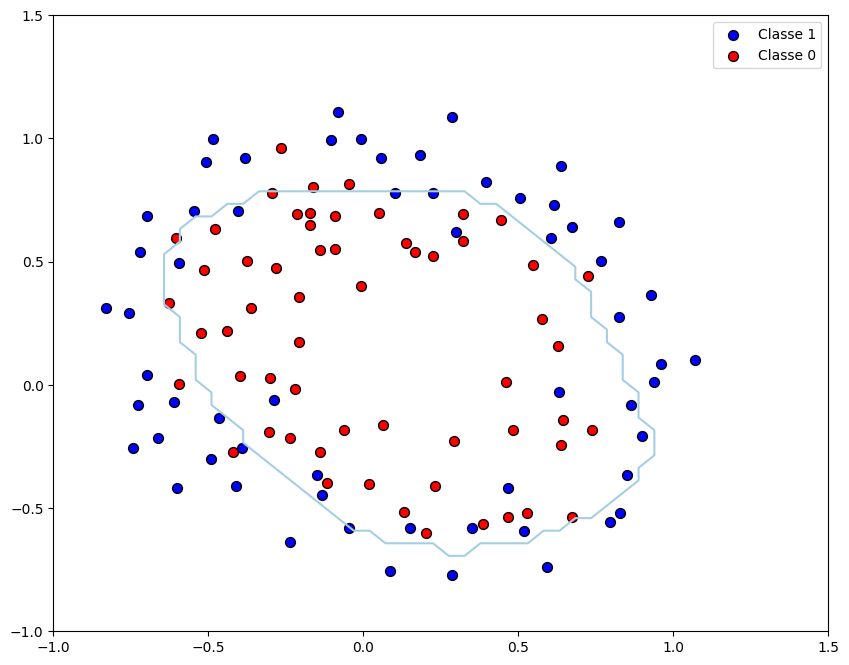

In [18]:
def plotarLDNaoLinear(model):

    #plota os dados de treinamento
    visualizarDados(X2,Y2)

    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros( [len(u), len(v)] )

    for i in range( len(u) ):
        for j in range( len(v) ):
            z[i,j] = model.predict( atributosPolinomiais( u[i], v[j] ) );

    plt.contour(u, v, z, levels=[0], cmap=plt.cm.Paired)


    plt.show()



########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) importe o método de Regressão Logística da biblioteca Scikit-learn
# (2) inicialize o método com custo igual a 100.0
# (3) inicialize o método com um valor para o parâmetro random state
# (4) use o método fit para treinar o modelo


model = LogisticRegression(C = 100, max_iter = 500, random_state = 10)
model.fit(X2_poli, Y2)


##########################################################################

# plota o modelo
plotarLDNaoLinear(model)

____
## Classificação de digitos numéricos

Deseja-se fazer a classificação automática de dígitos que estão presentes em um conjunto de imagens. Essas imagens têm dimensão de 28 x 28 pixels, onde cada pixel é um valor que representa a intensidade de tons de cinza naquela região.
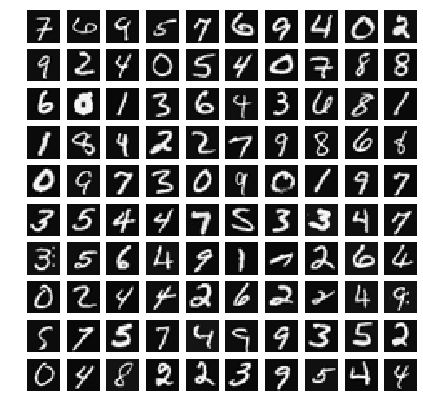
<center>
<div style="padding: 0px; float: center;">
    <img src="/content/figs/digitos.png"  style="height:400px;"/>
    <center><em>Figura 1. Amostras do conjunto de dados.</em></center>
</div>
</center>

### Carregando e visualizando os dados

Nessa etapa, iremos criar uma função para plotar os dados. O conjunto que você utilizará será de digitos manuscritos (Figura 1).

O conjunto de dados contém 5.000 amostras e encontra-se no diretorio **dados/imagens/MNIST**. O nome de cada subpasta representa a classe dos números contidos dentro dela.

Primeiro, vamos extrair as imagens do arquivo .zip.

In [14]:
# -*- coding: utf-8 -*-

import numpy as np  # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional
import cv2

from zipfile import ZipFile # biblioteca para arquivoz zipados

z = ZipFile('dados/MNIST.zip', 'r')
z.extractall('dados/')
z.close()

Vamos carregar essa base de dados e guardar as classes em um vetor.

In [15]:
def importDataset(path):
    # percorre as pastas e coleta as imagens
    labelList = []
    imgList = []
    for i in range(0,10):

        print("Folder: %d" %i)

        # coleta os nomes dos arquivos da pasta
        files = os.listdir(path + str(i) )

        for file in files:

            # abre a imagem
            img = cv2.imread(path + str(i) + '/' + file, cv2.IMREAD_GRAYSCALE)

            imgList.append(img)

            # guarda a classe da imagem
            labelList.append(i)

    return imgList, labelList

# Caminho dos arquivos
path = "dados/MNIST/"

imgList, labelList = importDataset(path)

print('\nQuantidade de imagens: ', len(imgList))

Folder: 0
Folder: 1
Folder: 2
Folder: 3
Folder: 4
Folder: 5
Folder: 6
Folder: 7
Folder: 8
Folder: 9

Quantidade de imagens:  5000


As imagens e as classes foram guardas em uma lista. Você deve converter as imagens em uma matriz, onde cada linha representará uma imagem. Converta também a lista de classes em um vetor.

In [19]:
# variável que deverá recer as imagens
X_img = None

# variável que irá receber as classes
Y = None

######################### COMPLETE O CÓDIGO AQUI  ########################
#
# (1) percorra todas as imagens da lista e converta em um vetor usando
#     a função ravel do numpy
#
# (2) converta a lista em um array usando a função asarray do numpy e guarde na variável X
#

for i in range(len(imgList)):
    imgList[i] = np.ravel(imgList[i])

X_img = np.array(imgList)
Y = np.array(labelList)


##########################################################################

print('\nDimensao de X: ', X_img.shape)

print('\nDimensao de Y: ', Y.shape)

print('\nClasses do problema: ', np.unique(Y))


Dimensao de X:  (5000, 784)

Dimensao de Y:  (5000,)

Classes do problema:  [0 1 2 3 4 5 6 7 8 9]


Os tons de cinza são representados por valores entre 0 e 255. Esse formato de valores não é adequado para métodos de classificação baseados em otimização. Por isso, você deve normalizar esses valores para o intervalor entre 0 e 1.

In [21]:
# variável que deverá recer as imagens normalizadas
X = None

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) normalize os pixels para um intervalo entre 0 e 1.
#
# Obs: cuidado porque os valores são inteiros. Divisão de dois inteiros
#      resulta em um novo inteiro

X = X_img / 255.0

##########################################################################

print('Maior valor de X: %1.10f' %np.max(X) )
print('Menor valor de X: %1.10f' %np.min(X) )

Maior valor de X: 1.0000000000
Menor valor de X: 0.0000000000


Vamos plotar aleatoriamente 100 amostras da base de dados.

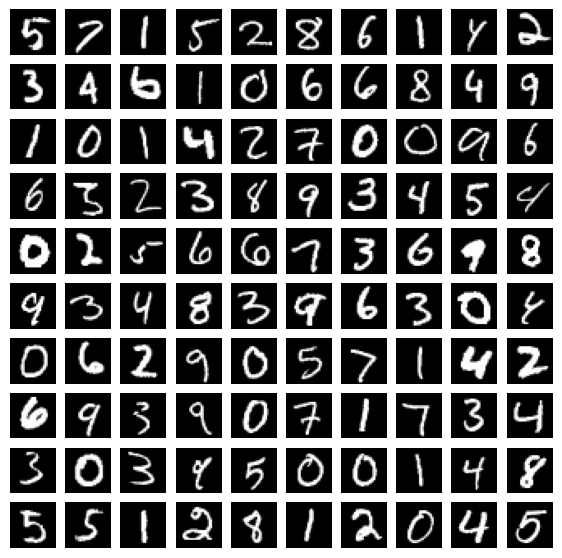

In [22]:
import matplotlib.pyplot as plt

def visualizaDados(X):
    example_width = int(round(np.sqrt(X.shape[1])) )

    # Calcula numero de linhas e colunas
    m, n = X.shape
    example_height = int(n / example_width)

    # Calcula numero de itens que serao exibidos
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, axs = plt.subplots(display_rows,display_cols, figsize=(7, 7))

    for ax, i in zip(axs.ravel(), range( X.shape[0] )):

        new_X = np.reshape( np.ravel(X[i,:]), (example_width, example_height) )

        ax.imshow(new_X, cmap='gray');
        ax.axis('off')

    plt.show()

idx_perm = np.random.permutation( range(X.shape[0]) )
visualizaDados( X[idx_perm[0:100],:] )

Antes de aplicar a regressão logística, vamos separar os dados em treino (80%) e teste (20%).

In [23]:
# define a porcentagem de treinamento
porcTrain = 0.8

# vamos usar uma semente para que sempre separe igualmente
randomSeed = 20

# variáveis que deverão guardar os dados de treino e teste
X_train = None
X_test = None

# variáveis que deverão guardar as classes de treino e teste
Y_train = None
Y_test = None

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) separe os dados em treino e teste usando a função StratifiedShuffleSplit da
#     biblioteca scikit learn
# (2) na inicializacao do modelo, configure o parâmetro random state com a semente informada
#     no código acima
# (3) use o método split da função StratifiedShuffleSplit para obter os índices de treino e teste.
#     Esse método retorna um generator. Para receber os valores, você pode usar um laço de
#     repetição ou usar a função next
#

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, train_size=porcTrain, random_state=0)

train_index, test_index = next(sss.split(X,Y))
X_train = X[train_index, :]
X_test = X[test_index, :]

Y_train = Y[train_index]
Y_test = Y[test_index]

##########################################################################

print('Qtd. dados de treinamento: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
print('Qtd. de dados de teste: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )

Qtd. dados de treinamento: 4000 (80.00%)
Qtd. de dados de teste: 1000 (20.00%)


Agora, vamos treinar a regressão logística com as amostras dessa base de dados.

Obs: como esse exemplo é complexo, altere o parâmetro **max_iter** da regressão logística para aumentar o número máximo de iterações.

In [24]:
# variável que deverá recer o modelo
model = None

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) importe o método de Regressão Logística da biblioteca Scikit-learn
# (2) inicialize o método com custo igual a 100.0
# (3) inicialize o método com um valor para o parâmetro random state
# (4) configura o parâmetro max_iter com um valor mais alto do que o padrão
# (5) use o método fit para treinar o modelo


model = LogisticRegression(C = 100, max_iter = 500, random_state = 10)
model.fit(X_train, Y_train)


##########################################################################

print(model)

print('Classes: ', model.classes_)

print('\nQtd. de pesos da primeira classe: ')
print(len(model.coef_[0])) # returns a matrix of weights (coefficients)

LogisticRegression(C=100, max_iter=500, random_state=10)
Classes:  [0 1 2 3 4 5 6 7 8 9]

Qtd. de pesos da primeira classe: 
784


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Agora vamos testar o classificador.

In [25]:
# variável que deverá recer as classes preditas
Y_pred = None

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) Use o método predict para predizer as classes do conjunto de teste
#

Y_pred = model.predict(X_test)

##########################################################################

print("Cinco primeiras classes preditas")
print(Y_pred[0:5])

Cinco primeiras classes preditas
[6 3 0 6 8]


Calcule o desempenho do método de classificação.

In [26]:
# variável que deverá receber os resultados
resultados = None

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) Use o método classification_report da biblioteca scikitlearn para
#     calcular o desempenho do classificador

from sklearn.metrics import classification_report

resultados = classification_report(Y_test, Y_pred)


##########################################################################

print(resultados)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       100
           1       0.92      0.98      0.95       100
           2       0.92      0.92      0.92       100
           3       0.84      0.92      0.88       100
           4       0.89      0.82      0.85       100
           5       0.82      0.79      0.81       100
           6       0.88      0.90      0.89       100
           7       0.91      0.91      0.91       100
           8       0.82      0.79      0.81       100
           9       0.85      0.84      0.84       100

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

